In [1]:
from numpy import array,arange,loadtxt
from matplotlib.pyplot import show,figure,plot,xlim,ylim,legend
from scipy.optimize import curve_fit

In [2]:
def fce_linear(x,a,b):
    return a * x + b

In [3]:
def fce_quad(x,a,b,c):
    return a * x + b * x**2 + c

In [4]:
def fce_trip(x,a,b,c,d):
    return a * x + b * x**2 + c * x**3 +d

In [5]:
z = loadtxt('calibration.ini',unpack=True)
x,y = z

In [6]:
opt_lin,var=curve_fit(fce_linear,x,y)
opt_quad,var=curve_fit(fce_quad,x,y)
opt_trip,var=curve_fit(fce_trip,x,y)

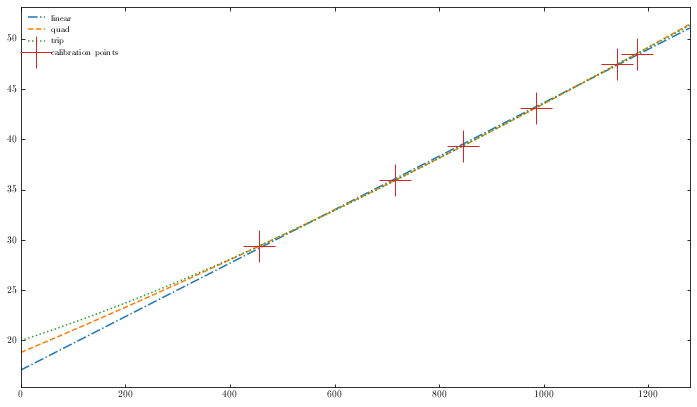

In [7]:
_x = arange(0,1280)

figure(figsize=(12,7))

plot(_x,fce_linear(_x,*opt_lin),'-.',label='linear')
plot(_x,fce_quad(_x,*opt_quad),'--',label='quad')
plot(_x,fce_trip(_x,*opt_trip),':',label='trip')
plot(x,y,'+',ms=32,label='calibration points')

xlim(0,1280)
legend(frameon=False)
